In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from tqdm.notebook import tqdm
import sys
import numpy as np
sys.path.append('..')
import config
import os

data_path_prefix = config.data_path
# 读取tag.txt文件
tags_data = pd.read_csv(os.path.join(data_path_prefix, 'tag.txt'), sep='\t', header=None, names=['user_id', 'tags'])


In [5]:
# 提取所有的标签，并统计每个标签的出现次数
tag_counts = dict()
all_tags = tags_data['tags'].dropna().str.split('_')
for tag in tqdm(all_tags):
    for t in tag:
        tag_counts[t] = tag_counts.get(t, 0) + 1

# 将标签出现次数转化为数据框（移除仅出现一次的标签）
tag_count_distribution = pd.DataFrame.from_dict(tag_counts, orient='index', columns=['count']).sort_values('count', ascending=False)
tag_count_distribution = tag_count_distribution[tag_count_distribution['count'] > 20]

# 计算每个标签出现次数的分布
tag_occurrence_distribution = tag_count_distribution['count'].value_counts().sort_index()
total_tags = tag_occurrence_distribution.sum()
tag_occurrence_percentage = tag_occurrence_distribution.cumsum() / total_tags

  0%|          | 0/275717 [00:00<?, ?it/s]

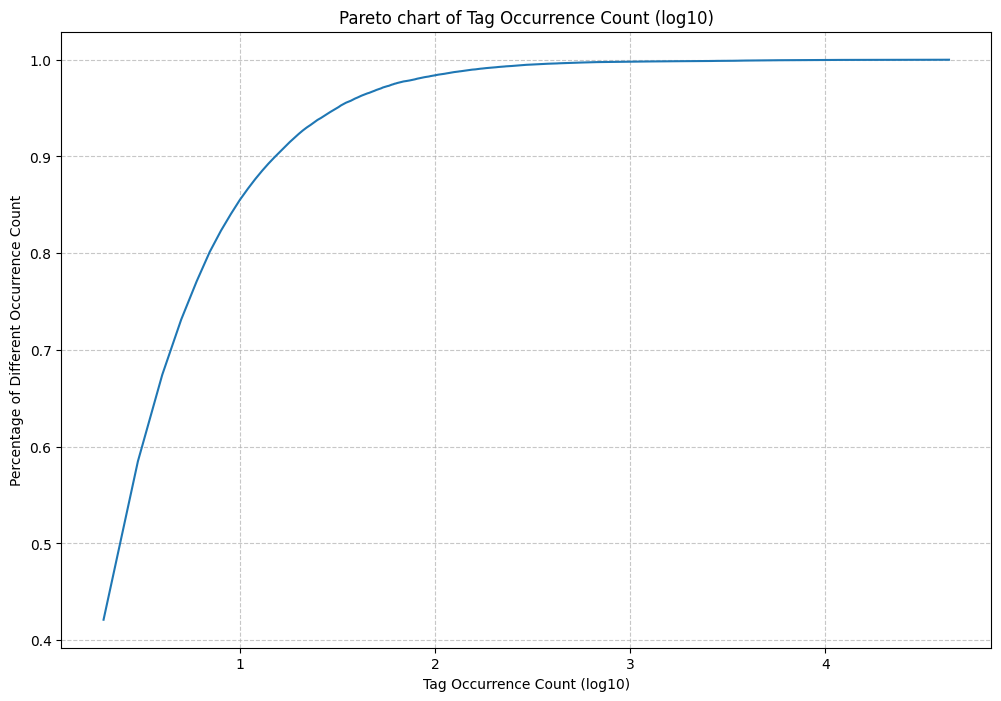

In [4]:
# 绘制帕累托图
# Plot the Pareto chart
plt.figure(figsize=(12, 8))
plt.plot(np.log10(tag_occurrence_percentage.index), tag_occurrence_percentage.values)
plt.xlabel('Tag Occurrence Count (log10)')
plt.ylabel('Percentage of Different Occurrence Count')
plt.title('Pareto chart of Tag Occurrence Count (log10)')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()